## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [59]:
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [6]:
arquivo = pd.read_csv('housing.csv')
df = pd.DataFrame(arquivo)

In [7]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [8]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [17]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [19]:
df.drop(columns=['ocean_proximity'], inplace=True)

In [21]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [23]:
y = df['median_house_value']

In [25]:
df.drop(columns=['median_house_value'], inplace=True)

In [27]:
X = df.copy()

In [29]:
X.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
dtype: object

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [33]:
tree1 = DecisionTreeRegressor(max_depth = 2)
tree2 = DecisionTreeRegressor(max_depth = 8)

In [35]:
tree1.fit(X_train, y_train)
tree2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [38]:
path = tree2.cost_complexity_pruning_path(X_train,y_train)

In [40]:
path

{'ccp_alphas': array([0.00000000e+00, 2.94472723e+03, 5.26265988e+03, 6.12405377e+03,
        1.03175846e+04, 3.01540068e+04, 3.01651005e+04, 4.56723571e+04,
        7.71852477e+04, 8.04261289e+04, 8.39907987e+04, 1.02756460e+05,
        1.05481728e+05, 1.55344558e+05, 1.55961304e+05, 1.62172083e+05,
        1.98802749e+05, 2.09174529e+05, 2.15899856e+05, 2.24251485e+05,
        2.30327499e+05, 2.68090395e+05, 2.82933157e+05, 2.86139824e+05,
        2.98192514e+05, 3.44213978e+05, 3.51362584e+05, 3.54098577e+05,
        3.57353842e+05, 3.75426222e+05, 3.89426338e+05, 4.69851214e+05,
        5.00572913e+05, 5.43733035e+05, 5.69176953e+05, 5.72985513e+05,
        5.84292336e+05, 5.91490690e+05, 6.11782890e+05, 6.26151400e+05,
        7.07014147e+05, 7.40607870e+05, 7.56506182e+05, 7.86426629e+05,
        8.31800198e+05, 8.58201682e+05, 8.79502110e+05, 9.16820891e+05,
        9.34918646e+05, 9.71405378e+05, 9.74433436e+05, 9.79239353e+05,
        1.00397254e+06, 1.01076648e+06, 1.04028770

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [43]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [45]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=100, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [47]:
train_scores = [mean_squared_error(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [mean_squared_error(y_test, clf.predict(X_test)) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

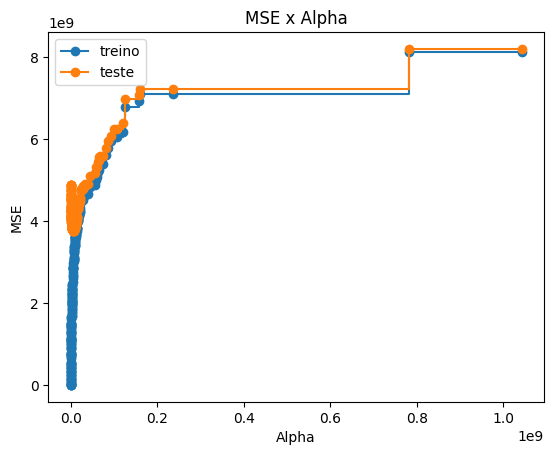

In [49]:
fig, ax = plt.subplots()
ax.set_xlabel('Alpha')
ax.set_ylabel('MSE')
ax.set_title('MSE x Alpha')
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label='treino', drawstyle='steps-post')
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label='teste', drawstyle='steps-post')
ax.legend()
plt.show()

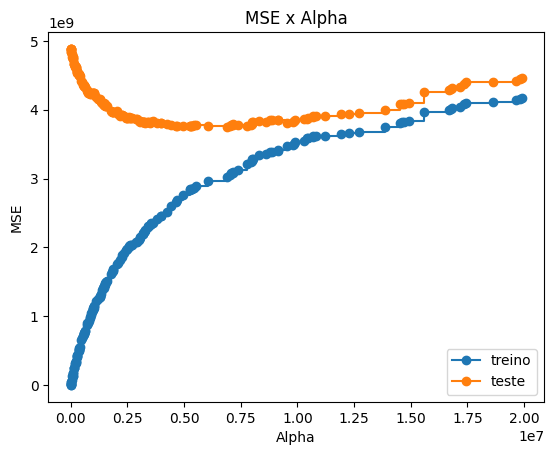

In [50]:
fig, ax = plt.subplots()
ax.set_xlabel('Alpha')
ax.set_ylabel('MSE')
ax.set_title('MSE x Alpha')
ax.plot(ccp_alphas[:170], train_scores[:170], marker='o', label='treino', drawstyle='steps-post')
ax.plot(ccp_alphas[:170], test_scores[:170], marker='o', label='teste', drawstyle='steps-post')
ax.legend()
plt.show()

In [51]:
min(test_scores)

3753438273.44496

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [286]:
arvore_final = DecisionTreeRegressor(random_state=100, ccp_alpha=3519266669.0794544)
arvore_final.fit(X_train, y_train)
print(arvore_final.tree_.max_depth)
print(arvore_final.score(X_test,y_test))
print(mean_squared_error(y_test, arvore_final.predict(X_test)))


1
0.30731017268224115
9272745005.105045


### 7. Visualize esta árvore.

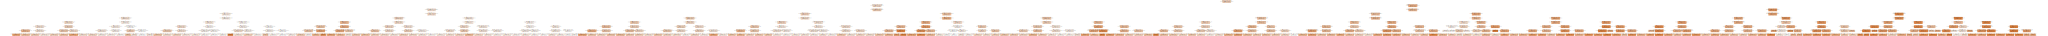

In [61]:
dot_data = tree.export_graphviz(tree2, out_file=None, feature_names=df.columns, filled=True)
graph = graphviz.Source(dot_data, format='png')
graph
